# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random;
import pandas as pd;
import matplotlib.pyplot as plt;

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [108]:
# your code here
times = 10

def roll_the_dice(times):
    return random.choices(range(1,7), k=times);
# roll_the_dice(times)
dice_results = pd.DataFrame(roll_the_dice(times), columns=['Value'])
dice_results.index += 1
dice_results = dice_results.sort_values('Value')

In [109]:
dice_results

,Value
3,1
9,2
10,2
4,3
5,4
6,5
7,5
8,5
1,6
2,6


#### 2.- Plot the results sorted by value.

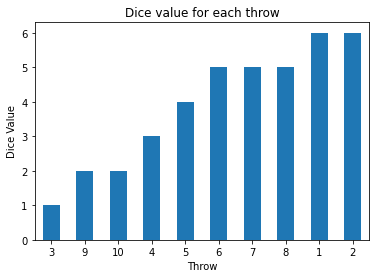

In [110]:
# your code here
dice_results[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xlabel('Throw')
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [111]:
dice_results

,Value
3,1
9,2
10,2
4,3
5,4
6,5
7,5
8,5
1,6
2,6


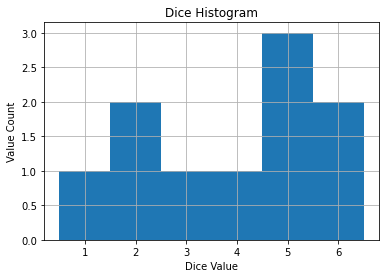

In [112]:
# your code here


dice_results.hist(bins =  [n + 0.5 for n in range(0,7)])
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Dice Histogram')
plt.show()

In [24]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [113]:
# your code here
def mean_method_one(df):
    return round(df['Value'].sum() / len(df['Value']))

In [114]:
mean_method_one(dice_results)

4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [115]:
# your code here
def mean_method_two(df):
    frequency = df['Value'].value_counts().values
    dice_value = df['Value'].value_counts().index
    return round(sum(dice_value * frequency) / len(df['Value']))



In [116]:
mean_method_two(dice_results)

4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [117]:
# your code here
def median_calculation(df):
    if len(df['Value']) % 2 == 0:
        return round((df['Value'][len(df) // 2] + df['Value'][(len(df) // 2) + 1]) / 2)
    return df['Value'][(len(df) // 2) + 1]



In [118]:
median_calculation(dice_results)

4

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [119]:
# your code here
def quartiles_calculation(df):
    Q2 = median_calculation(df)
    index = len(sorted_dice_results['Value']) // 2
    dice_results.reset_index(drop=True, inplace=True)
    if len(df['Value']) % 2 == 0:
        lower_df = df.iloc[0:index]
        upper_df = df.iloc[index:]
    else:
        lower_df = df.iloc[0:index-1]
        upper_df = df.iloc[index+1:]
    upper_df = reset_df_indexes(upper_df)
    Q1 = median_calculation(lower_df)
    Q3 = median_calculation(upper_df)
    return Q1,Q2,Q3

In [120]:
quartiles_calculation(dice_results)

(3, 4, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [122]:
import os

In [124]:
os.chdir(r'C:/Users/bruna/IronHack/GitHub/data-ft-par-labs/Labs/data/')

In [136]:
# your code here
roll_the_dice_hundred = pd.read_csv('roll_the_dice_hundred.csv', index_col=0)
roll_the_dice_hundred.columns = ['Roll', 'Value']

roll_the_dice_hundred

,Roll,Value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


In [137]:
sorted_roll_the_dice_hundred = roll_the_dice_hundred.sort_values('Value')
sorted_roll_the_dice_hundred


,Roll,Value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


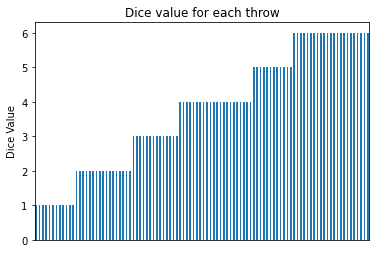

In [138]:
sorted_roll_the_dice_hundred[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [141]:
# your code here
print('Mean Method 1: {}'.format(mean_method_one(roll_the_dice_hundred)))
print('Mean Method 2: {}'.format(mean_method_two(roll_the_dice_hundred)))

Mean Method 1: 4
Mean Method 2: 4


#### 3.- Now, calculate the frequency distribution.


In [143]:
# your code here
frequency = roll_the_dice_hundred['Value'].value_counts(sort=False)



#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

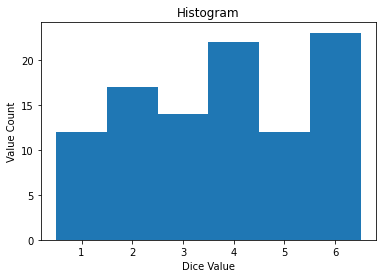

1    12
2    17
3    14
4    22
5    12
6    23
Name: Value, dtype: int64

In [144]:
# your code here
# Histogram.
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_hundred['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

# Show the plot.
plt.show()
frequency


<span class="girk">your comments here</span> :

We know that the probability of each number is the same (1/6), so the frequency of each number should be similar and we should expect to see a uniform histogram. However, we can see that the numbers that showed most times are 4 and 6, and their frequency is significantly greater than the frequency of 1 and 5, which showed the least. That's why the mean value is greater than 3 (almost 4).  


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

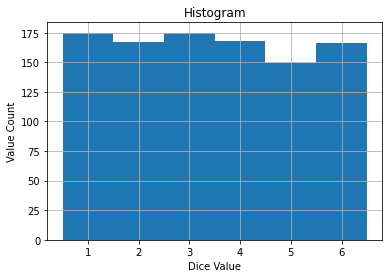

1    175
2    167
3    175
4    168
5    149
6    166
Name: Value, dtype: int64

In [146]:
# your code here
# Read the csv.
roll_the_dice_thousand = pd.read_csv('roll_the_dice_thousand.csv', index_col=0)
roll_the_dice_thousand.columns = ['Roll', 'Value']

# Calculate the frequency distribution.
frequency = roll_the_dice_thousand['Value'].value_counts(sort=False)


# Histogram

roll_the_dice_thousand['Value'].hist(bins=[n + 0.5 for n in range(0,7)])
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

plt.show()
frequency


<span class="girk">your comments here </span> :

In this plot we can see that the distribution is now more uniform than before, 
which is the behaviour we were expecting because all numbers are equally probable. 
The histogram changed because now we have more samples of random dice rolls and 
the sample distribution tends to be more similar to the population distribution.



## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

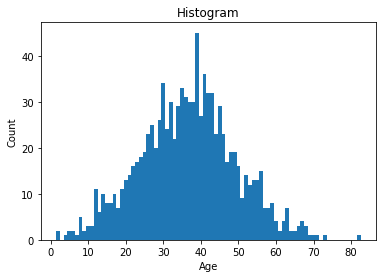

In [150]:
# your code here
# Read the csv
ages_population = pd.read_csv('ages_population.csv')
ages_population = ages_population.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population['observation'].max()) + 1
min_range = int(ages_population['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [152]:
# your code here
ages_population['observation'].describe().round()

count    1000.0
mean       37.0
std        13.0
min         1.0
25%        28.0
50%        37.0
75%        45.0
max        82.0
Name: observation, dtype: float64


your comments here :
    YES



#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

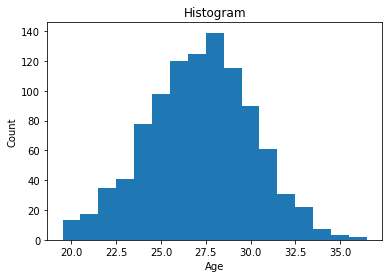

In [153]:
# your code here
ages_population_2 = pd.read_csv('ages_population2.csv')
ages_population_2 = ages_population_2.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_2['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_2['observation'].max()) + 1
min_range = int(ages_population_2['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_2['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?


<span class="girk">your comments here</span> :

It seems that this time we have a narrower range of ages. Now, the mean value should be around 27 and the standard deviation around 2. We can see that the people in this neighbourhood are younger compared to the first neighbourhood, where the range was wider and there was more middle-aged people. 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [154]:
# your code here
ages_population_2['observation'].describe().round()

count    1000.0
mean       27.0
std         3.0
min        19.0
25%        25.0
50%        27.0
75%        29.0
max        36.0
Name: observation, dtype: float64


<span class="girk">your comments here</span> : 
    
The exact results are similar to the ones expected.


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

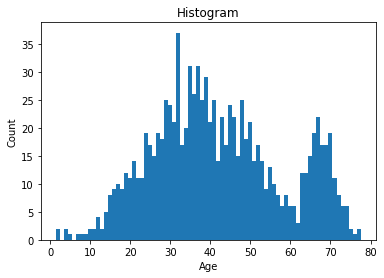

In [156]:
# your code here
ages_population_3 = pd.read_csv('ages_population3.csv')
ages_population_3 = ages_population_3.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_3['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_3['observation'].max()) + 1
min_range = int(ages_population_3['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_3['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [158]:
# your code here
ages_population_3['observation'].describe().round()

count    1000.0
mean       42.0
std        16.0
min         1.0
25%        30.0
50%        40.0
75%        53.0
max        77.0
Name: observation, dtype: float64


<span class="girk">your comments here</span> :

We can see that the distribution is now formed by two normals. The first one is centered around 35 and is formed by a lot more samples than the second one, which is centered around 68 approximately. 


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [160]:
# your code here
sumamry_df = pd.concat([ages_population['observation'], 
                        ages_population_2['observation'], 
                        ages_population_3['observation']], 
                        axis=1, keys=['df1', 'df2', 'df3'])
sumamry_df.describe().round()

,df1,df2,df3
count,1000.0,1000.0,1000.0
mean,37.0,27.0,42.0
std,13.0,3.0,16.0
min,1.0,19.0,1.0
25%,28.0,25.0,30.0
50%,37.0,27.0,40.0
75%,45.0,29.0,53.0
max,82.0,36.0,77.0
